<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/HW7/SidPatel_HW7_clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
pl.style.use('ggplot')
from scipy.cluster.hierarchy import dendrogram, linkage


Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [2]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv",header=None).iloc[:,1:]

In [3]:
genes

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,48.000000,49.000000,50.000000,51.000000,52.000000,55.000000,56.000000,57.000000,58.000000,60.000000,61.000000,64.000000,65.000000,66.000000,68.000000,69.000000,72.000000,73.000000,74.000000,75.000000,76.000000,77.000000,78.000000,79.000000,81.000000,83.000000,84.000000,85.000000,86.000000,87.000000
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [4]:
#first row is represents headers -> remove
#last row has NaN values meaning NaN values exist within the data -> remove NaN valued rows

# 1. explore the data. 

In [3]:
genes = genes.dropna()
genes = genes.drop([0])
genes

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,-0.333845,0.272029,-0.170722,0.038204,-0.097601,-0.592688,0.338378,-0.152175,0.302457,0.858478,...,-0.559128,0.236490,0.171963,0.124660,1.121866,-0.486518,-0.642105,-0.423110,-0.269496,0.510805
2599,-0.387013,-0.351933,0.363170,-0.532783,-0.405961,-0.350308,0.607677,-0.033040,0.388872,-0.238816,...,0.013212,0.122758,0.260209,0.014410,0.155995,-0.184897,0.073087,-0.095532,-0.348209,0.390796
2600,-0.167853,-0.316385,0.087252,-0.117309,-0.871179,-0.468648,0.068771,-0.143372,2.719371,-0.327453,...,2.107459,-0.798081,-0.395218,-0.850703,-0.268263,-0.573838,2.586922,-0.532048,-0.416461,0.340277
2601,-0.793226,-0.316129,-0.330165,-1.328636,-0.776035,-0.114225,0.255864,-0.005224,0.380932,-0.108821,...,-0.403937,-0.203626,0.127042,-0.407454,0.075773,-0.581201,-0.471235,-0.151244,-0.742843,0.051671


# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [4]:
scaledgenes = skl.preprocessing.scale(genes,axis=0 ,with_mean=True, with_std=True, copy=True)

In [5]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
         0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,
         0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
         0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,
         0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        -0.,  0., -0., -0., -0., -0., -0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [6]:
twodproj = skl.manifold.TSNE(n_components=2,perplexity=30,init='random',random_state=462).fit_transform(scaledgenes)

In [7]:
twodproj.shape

(2602, 2)

In [8]:
twodproj

array([[-26.808031 ,   2.2394018],
       [-26.772453 ,   2.3686826],
       [ -5.2611337,  13.504115 ],
       ...,
       [ 27.257872 ,  31.056969 ],
       [ -2.1706545,  39.102955 ],
       [ -6.8757305,  17.090162 ]], dtype=float32)

2.3 plot the TSNE projection


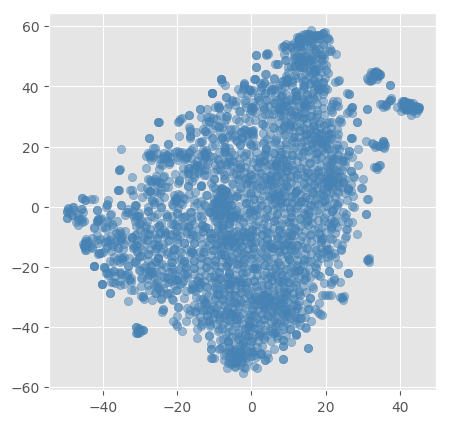

In [9]:
#https://towardsdatascience.com/t-sne-python-example-1ded9953f26
plt.figure(figsize=(5,5),dpi=100)
plt.scatter(x=twodproj[:,0],y=twodproj[:,1],c="steelblue",alpha=0.5)


Figure 1: This is the TSNE scatterplot of the scaledgenes data; 2d projection of the data. When TSNE does its calculations, there is a perplexity parameter which provides different results based on the inputted value. However I had no idea which was the best parameter value to pick, so I decided to stick to the default value of 30.

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [10]:
def calICVar(X,labels, model):
    n_clusters = np.unique(labels).shape[0]
    #print(n_clusters)

    icv = np.zeros(n_clusters)
    
    for i in range(n_clusters):
        
        #X[labels==i] checks that the point is in the correct cluster
        dist = np.sqrt((X[labels==i] - model.cluster_centers_[i])**2) /n_clusters #divide by n clusters since icv grows with n otherwise
        icv[i] = ((dist**2).sum() / ((labels == i).sum() - 1)).sum()

        
        
    return icv.sum()

In [13]:
'''
l = []
for i in range(0,10):
    l.append((geneclustersKM.labels_==i).sum())
print(l)
print(sum(l))
'''

'\nl = []\nfor i in range(0,10):\n    l.append((geneclustersKM.labels_==i).sum())\nprint(l)\nprint(sum(l))\n'

In [11]:
def MyicvElbow(X): 
    var = []
    for i in range(1,11):
        kmodel = cluster.KMeans(n_clusters=i).fit(X)
        var.append(calICVar(X,kmodel.labels_,kmodel));
    
    #print(var)
    plt.plot(list(range(1,11)),var,'-o')
    plt.xticks(np.arange(1, 11, 1)) #https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
    plt.ylabel("Intracluster variance")
    plt.xlabel("Number of clusters")


In [12]:
def inertTEST(X, labels, model):
    n_clusters = np.unique(labels).shape[0]
    #print(n_clusters)

    icv = np.zeros(n_clusters)
    for i in range(n_clusters):
    #X[labels==i] checks that the point is in the correct cluster
        dist = np.sqrt((X[labels==i] - model.cluster_centers_[i])**2)

        icv[i]=(dist**2).sum()

    return icv.sum()

def myElbow(scaledX):
    var = []
    for i in range(1,11):
        kmodel = cluster.KMeans(n_clusters=i).fit(scaledX)
        var.append(inertTEST(scaledX,kmodel.labels_,kmodel));
    
    #print(var)
    plt.plot(list(range(1,11)),var,'-o')
    plt.xticks(np.arange(1, 11, 1)) #https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
    plt.ylabel("Inertia (my calculation)")
    plt.xlabel("Number of clusters")




In [16]:
#geneclustersKM.inertia_

In [17]:
#inertTEST(scaledgenes,geneclustersKM.labels_,geneclustersKM)

In [13]:
def sklELBOW(Xscale,nc):
    variances = []
    for i in range(1,nc+1):
        KM = cluster.KMeans(n_clusters=i).fit(Xscale)
        variances.append(KM.inertia_) #https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca
                                      #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
                                      

    pl.plot(list(range(1,nc+1)),variances,'-o')
    pl.ylabel("Inertia (sklearn calculation")
    plt.xlabel("Number of clusters")
    plt.xticks(np.arange(1, nc+1, 1))
    #print(variances)
#elbow(scaledgenes,10)

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

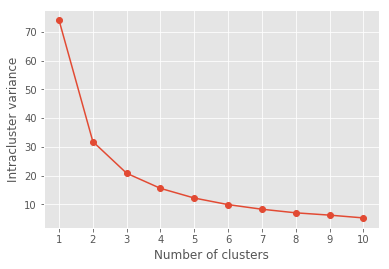

In [14]:
MyicvElbow(scaledgenes)

Figure 2: This is a plot of Intracluster variances vs number of clusters. Values are calculated via the calICV function. Here we have an elbow plot, we can see that past 3 clusters, the icv slowly gets smaller, which means 3 clusters is about the optimal amount.

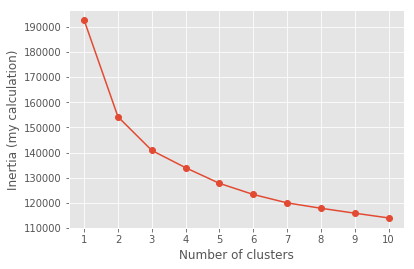

In [15]:
myElbow(scaledgenes)

Figure 3: This is a plot of inertia values vs number of clusters. Values are calculated via the inertTEST function, just to see if I understood what inertia values are. Here we also have an elbow plot, showing that the optimal number of clusters is about 3.

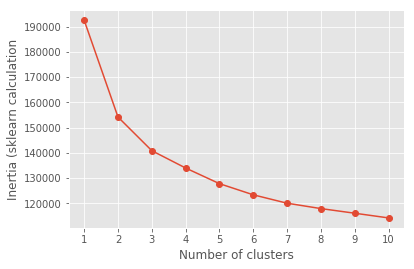

In [16]:
sklELBOW(scaledgenes,10)

Figure 4: Exact same plot as Figure 3, but values were instead calculated by sklearn's .inertia_ attribute.

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

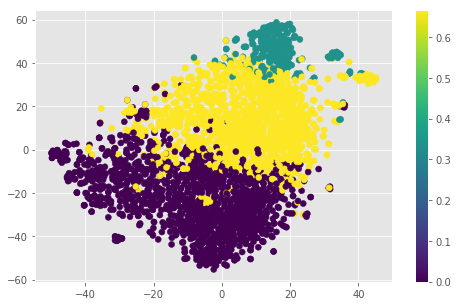

In [17]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.figure(figsize=(8,5))
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters, alpha=1)
pl.colorbar();


Figure 6: This is the TSNE plot of the scaledgenes data (2d projection of data), just like Figure 1. Except here the data points are colored based on the clustering done by KMeans operation we did (geneclustersKM). For this KMeans operation we chose n_clusters = 3, and it is reflected in this plot where we see three distinct colors representing the three different clusters.

ideally you should be able to isolate the little islands, like the one on the left "at 7 hour". Try to set the starting guess in a way that may facilitate this

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [23]:
#from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
geneclustersAg = cluster.AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward").fit(scaledgenes)

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [19]:
Zw = linkage(scaledgenes, "ward")

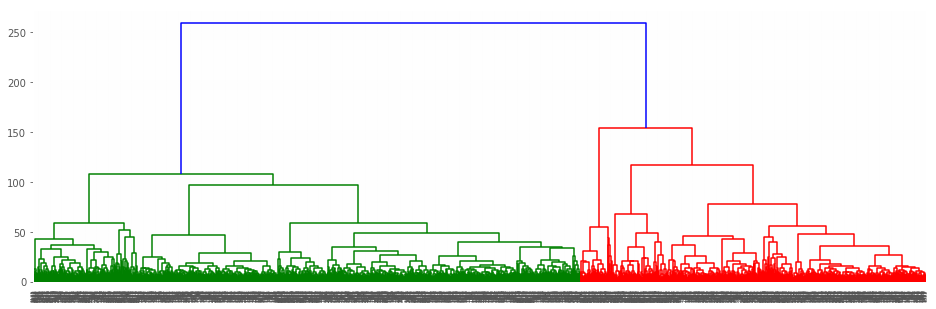

In [20]:
plt.figure(figsize(16,5))
dn = dendrogram(Zw)

Figure 7: This is a dendogram plot of the scaledgenes data, computed through scipy using the "ward" method of calculating linkage. Here I'm not sure how to really read this dendogram and the relation between clusters. What I do know is that it is showing how close datapoints are to each other.

4b.3 repeat with a different linkage and comment on differences

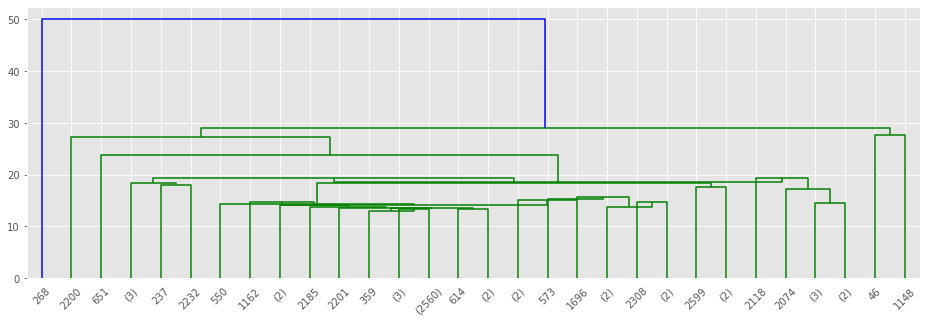

In [27]:
Zc = linkage(scaledgenes, 'median')
dnc = dendrogram(Zc,truncate_mode='lastp')

Figure 8: This is a dendogram just like Figure 7. However instead of the "ward" method I chose the "median" method instead. Note that when I plotted the dendogram originally, it was quite unreadable, so I had apply truncate_mode in the paremeters to a setting of "lastp". What "lastp" or any of the truncate modes do specifically, is a bit beyond me currently, but all I know is that truncate_mode allows for us to read the dendogram a bit more than it would be originally. Main difference is that instead of the three colored links in Figure 7, here we have two colored links, where the green encompasses pretty much all the data, and the blue link encompasses the green.

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

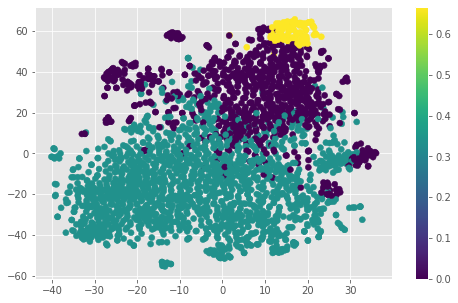

In [28]:
pl.figure(figsize=(8,5))
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_/ geneclustersAg.n_clusters, alpha=1)
pl.colorbar();

Figure 9: This is the TSNE plot of the scaledgenes data (2d projection of data), just like Figure 6. Except here the data points are colored based on the clustering done by Agglomerative Clustering operation we did (geneclustersAg). For this Agglomerative Clustering operation we chose n_clusters = 3 as based on KMeans and the elbow plots, and it is reflected in this plot where we see three distinct colors representing the three different clusters. Difference here compared to Figure 6 where the two larger clusters seemed pretty even, here one of the clusters dominates more (has more data points) than the other two clusters.

In [29]:
geneclustersAg.labels_

array([1, 1, 1, ..., 0, 0, 0])

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative


---

<h1 style="color:red"> Awesome !</h1>
